In [6]:
%matplotlib inline

In [4]:
import os
import sys

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from genetic_selection import GeneticSelectionCV

import utils

plt.rcParams['figure.figsize'] = (17, 5)

In [5]:
mat = scipy.io.loadmat("data/PCMAC.mat")

X=mat['X']
y = mat['Y'][:, 0] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = skl.svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

Accuracy: 84.05%


In [7]:
model = skl.svm.SVC()
selector = GeneticSelectionCV(model,
                             cv=5,
                             verbose=1,
                             scoring="accuracy",
                             n_population=50,
                             crossover_proba=0.5,
                             mutation_proba=0.2,
                             n_generations=10,
                             crossover_independent_proba=0.5,
                             mutation_independent_proba=0.5,
                             tournament_size=3,
                             caching=True,
                             n_jobs=-1)
selector = selector.fit(X_train, y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                                	std                        	min                                	max                                
0  	50    	[  7.73405273e-01   1.64394000e+03]	[  0.04886132  30.4213149 ]	[  6.33821542e-01   1.58100000e+03]	[  8.66192035e-01   1.71700000e+03]
1  	28    	[  8.01593244e-01   1.65036000e+03]	[  0.03583202  24.44320765]	[  6.96319286e-01   1.60100000e+03]	[  8.66192035e-01   1.70100000e+03]
2  	30    	[  8.12522954e-01   1.65396000e+03]	[  0.0349142  21.9480842]  	[  7.15469512e-01   1.61100000e+03]	[  8.66192035e-01   1.71400000e+03]
3  	26    	[  8.24849187e-01   1.64682000e+03]	[  0.03887846  26.17914437]	[  6.54415382e-01   1.60100000e+03]	[  8.66924536e-01   1.70100000e+03]
4  	35    	[  8.33234871e-01   1.64870000e+03]	[  2.81491940e-02   2.95135562e+01]	[  7.61006553e-01   1.57500000e+03]	[  8.66924536e-01   1.71500000e+03]
5  	27    	[  8.30556226e-01   1.66092000e+03]	[  0.04459976  27.69

In [8]:
selector.n_features_

1671

In [10]:
X_train_new = X_train[:, selector.support_]
X_test_new = X_test[:, selector.support_]

# Support vector classification.
clf_gs = skl.svm.SVC()
clf_gs.fit(X_train_new, y_train)
score_gs = clf_gs.score(X_test_new, y_test)
print('Accuracy: {:.2%}'.format(score_gs))

Accuracy: 85.76%


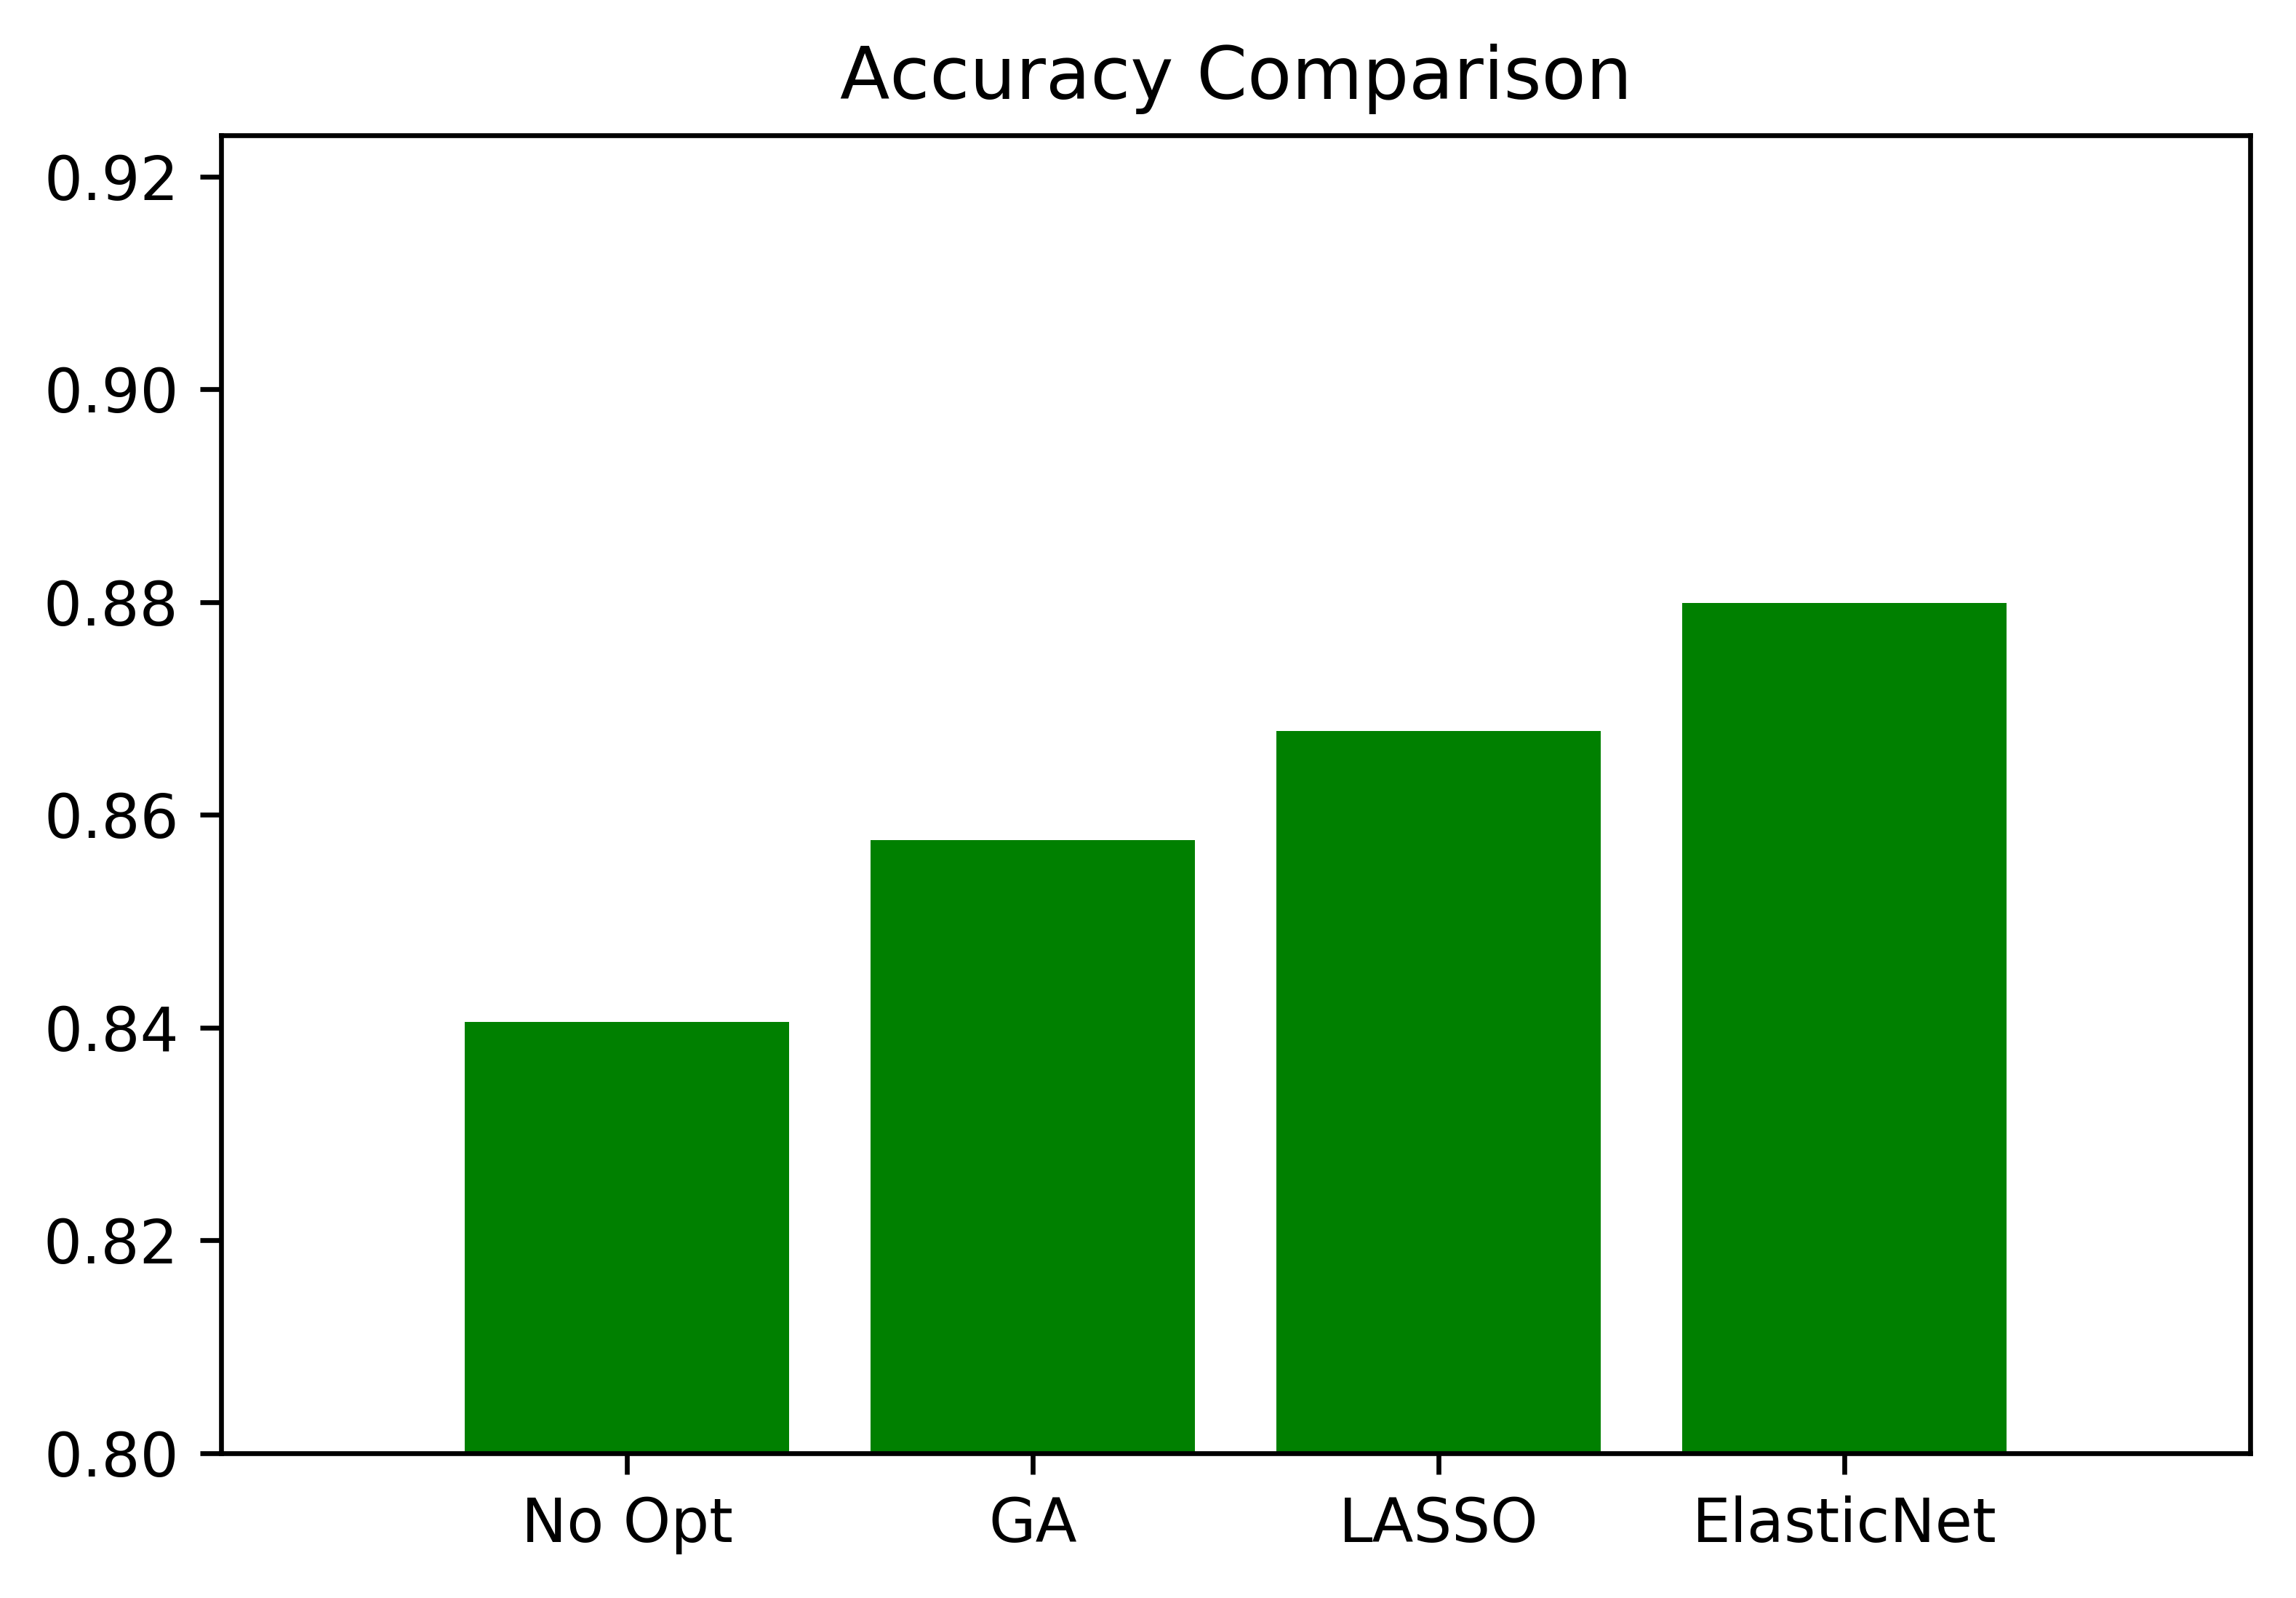

In [15]:
plt.figure()
plt.figure(num=None, figsize=(6, 4), dpi=600, facecolor='w', edgecolor='k')
plt.title("Accuracy Comparison")
plt.bar(range(4), [0.8405,0.8576,0.8679,0.8799],color="g", align="center")

labels = ["No Opt", "GA", "LASSO","ElasticNet"]
plt.xticks(range(4),labels )
plt.xlim([-1, 4])
plt.ylim(ymin=0.8)
plt.savefig("pcmac_acc.png")
plt.show()

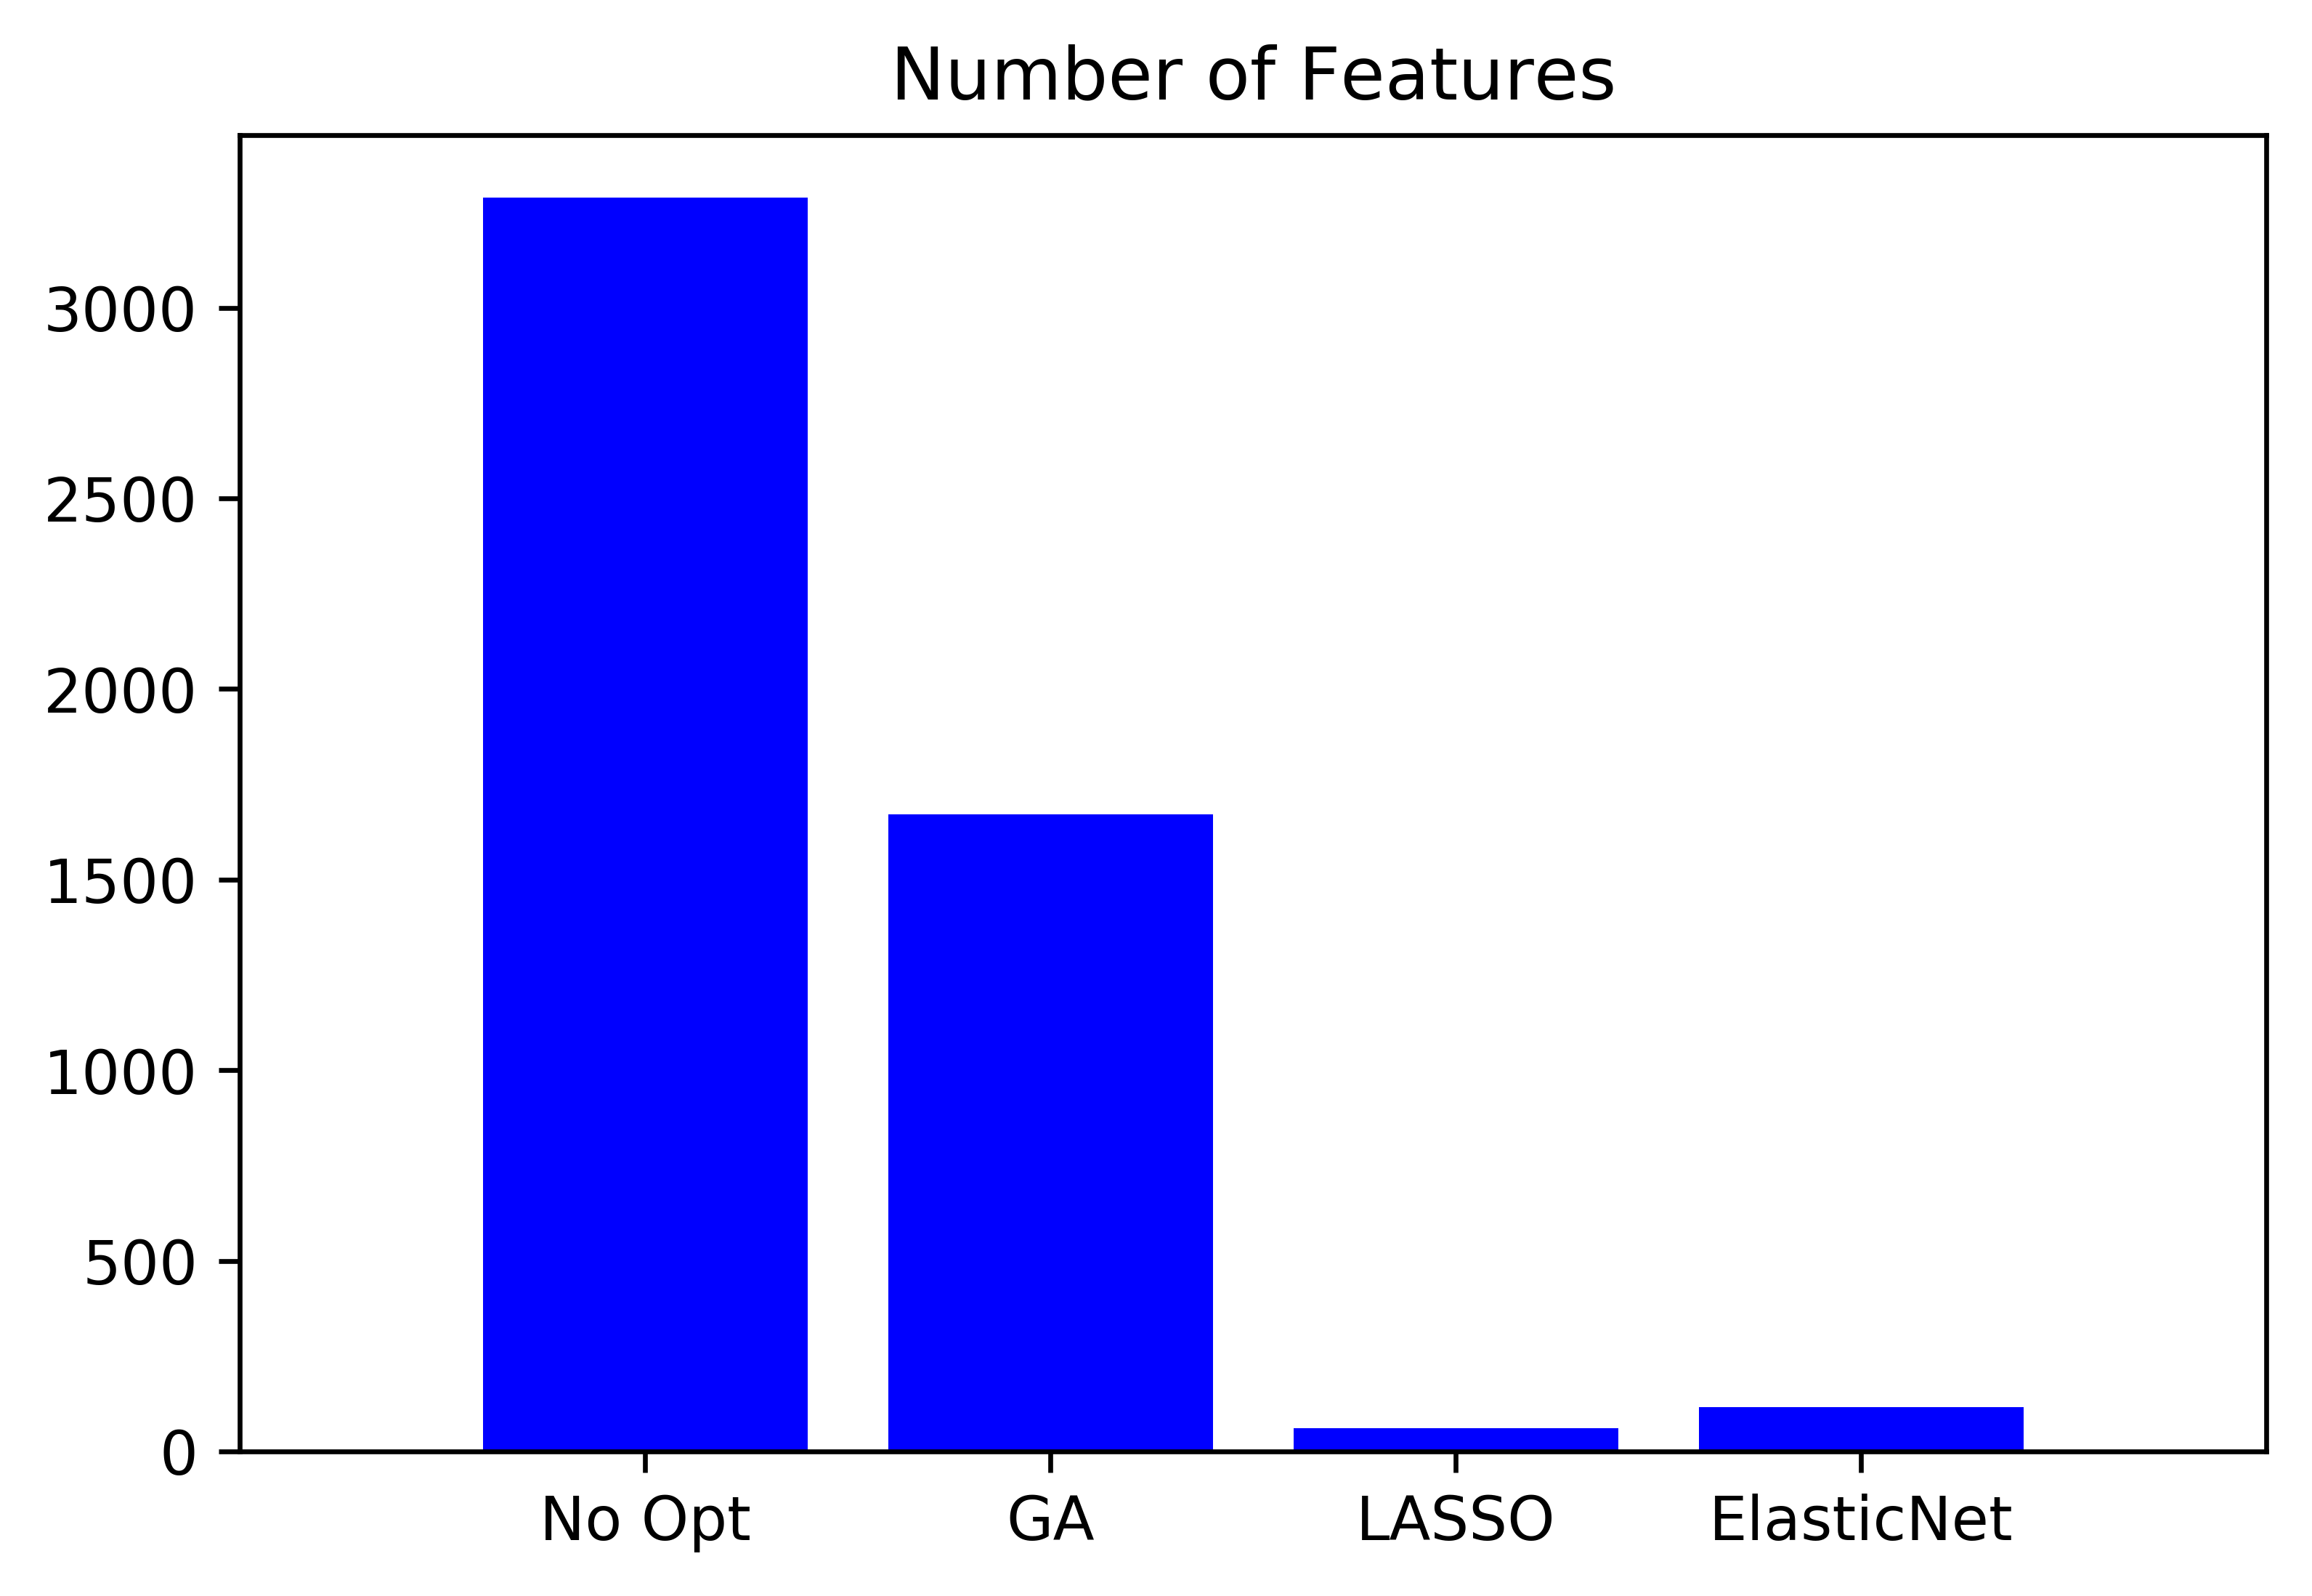

In [16]:
plt.figure()
plt.figure(num=None, figsize=(6, 4), dpi=600, facecolor='w', edgecolor='k')
plt.title("Number of Features")

plt.bar(range(4), [3289,1671,62,117], color="b", align="center")

labels = ["No Opt", "GA", "LASSO","ElasticNet"]
plt.xticks(range(4),labels )
plt.xlim([-1, 4])
plt.ylim(ymin=0.8)
plt.savefig("pcmac_nfeatures.png")
plt.show()